# Temperature

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

### your name: Frank D'Agostino

## <font color=red> Start by installing a package for plotting maps: cartopy. 
    
**Option 1:** from the Anaconda Navigator: click environments -> search, toggle to "uninstalled", makr and click install.

**Option 2:** from a terminal:

conda install cartopy

or if this does not work

pip install cartopy

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
# cortopy allows to plot data over maps in various spherical prjections"
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy import config
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import solve_ivp
from scipy import optimize

# load data from pickle file:
# ---------------------------
with open('./Temperature_variables.pickle', 'rb') as file:
        d = pickle.load(file)
        # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key, "; size=", d[key].shape)
            #print("; type=",type(d[key]))
        globals().update(d)


extracting pickled variable: name= hockeystick_annual_temperature_anomaly_timeseries ; size= (2, 1507)
extracting pickled variable: name= rcp26_global_sat_anomaly_timeseries ; size= (2, 95)
extracting pickled variable: name= rcp45_global_sat_anomaly_timeseries ; size= (2, 295)
extracting pickled variable: name= rcp85_first_5yr_sat_map ; size= (90, 144)
extracting pickled variable: name= rcp85_global_sat_anomaly_timeseries ; size= (2, 95)
extracting pickled variable: name= rcp85_last_5yr_sat_map ; size= (90, 144)
extracting pickled variable: name= rcp85_sat_map_axes ; size= (2,)
extracting pickled variable: name= sat_control_series_GFDL ; size= (100,)
extracting pickled variable: name= sat_obs_GISS_annual_anomaly_timeseries ; size= (2, 139)


## 1) Characterize the warming in time, latitude and longitude:

### 1a) The globally-averaged temperature over the past 1000+ years: the "hockeystick curve"

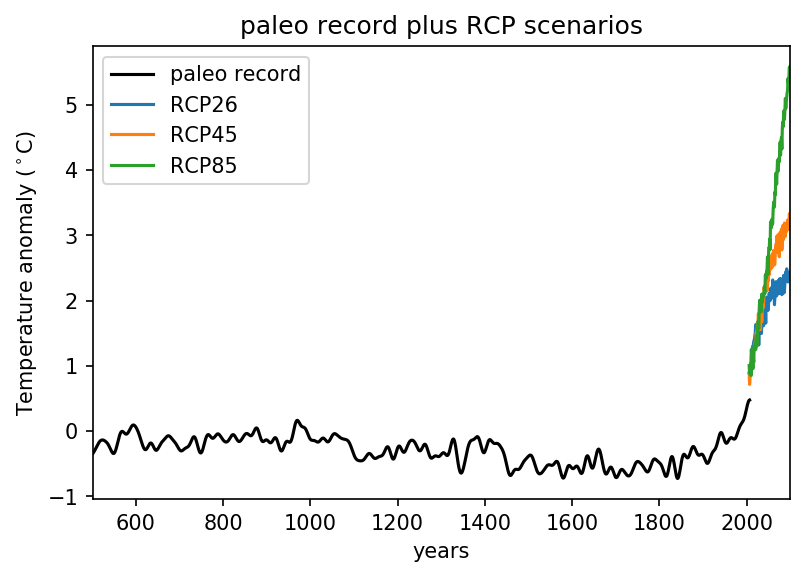

In [5]:
"""
Plot the paleo global temperature record followed by three RCP scenarios.
"""
historic=hockeystick_annual_temperature_anomaly_timeseries
rcp26=rcp26_global_sat_anomaly_timeseries
rcp45=rcp45_global_sat_anomaly_timeseries
rcp85=rcp85_global_sat_anomaly_timeseries

plt.figure(dpi=150)
# plot:
plt.plot(historic[0,:], historic[1,:], "k",label="paleo record")
# plot(rcp26, rcp45, rcp 85 XX
plt.plot(rcp26[0,:], rcp26[1,:], label="RCP26")
plt.plot(rcp45[0,:], rcp45[1,:], label="RCP45")
plt.plot(rcp85[0,:], rcp85[1,:], label="RCP85")

# labels and titles:
plt.xlim(hockeystick_annual_temperature_anomaly_timeseries[0,0],2100)
plt.ylabel("Temperature anomaly ($^\circ$C)")
plt.xlabel("years")
plt.title("paleo record plus RCP scenarios")
plt.legend()
plt.show()


## 1b) draw a map of global warming

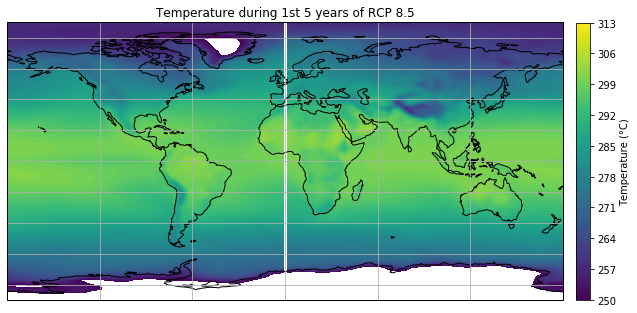

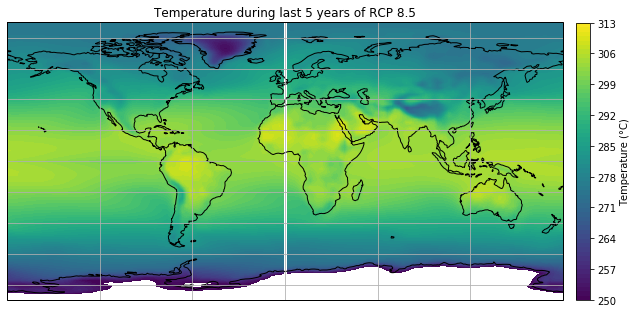

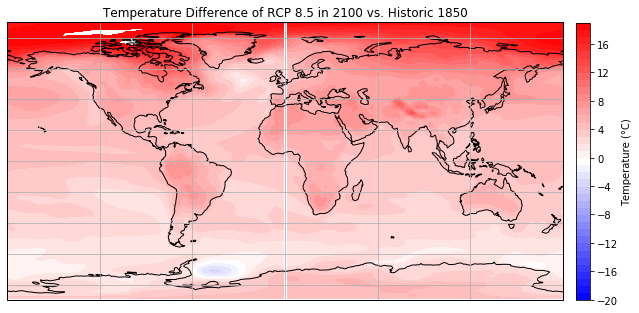

In [6]:
# loading data from file
warming_sat_map_data = rcp85_last_5yr_sat_map-rcp85_first_5yr_sat_map
# and the plot axes:
longitude = rcp85_sat_map_axes[1]
latitude = rcp85_sat_map_axes[0]
contour_levels=np.arange(250,314,1)
contour_level_warming=np.arange(-20, 20, 1)

# plot first 5 year temperature:
# -------------------------------
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()

# plot contours:
c=plt.contourf(longitude, latitude, rcp85_first_5yr_sat_map,contour_levels)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('Temperature (°C)')
plt.title('Temperature during 1st 5 years of RCP 8.5')
plt.show()

# plot last 5 year temperature:
# -------------------------------
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()

# plot contours:
c=plt.contourf(longitude, latitude, rcp85_last_5yr_sat_map,contour_levels)
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('Temperature (°C)')
plt.title('Temperature during last 5 years of RCP 8.5')
plt.show()

# plot the warming:
# ------------------
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.set_extent([0, 3600, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()

# plot contours:
c=plt.contourf(longitude, latitude, warming_sat_map_data, contour_level_warming, cmap="bwr")
# draw the colorbar
clb=plt.colorbar(c, shrink=0.85, pad=0.02)
# add title/ labels:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
clb.set_label('Temperature (°C)')
plt.title('Temperature Difference of RCP 8.5 in 2100 vs. Historic 1850')
plt.show()


## 1c) zonally averaged warming:

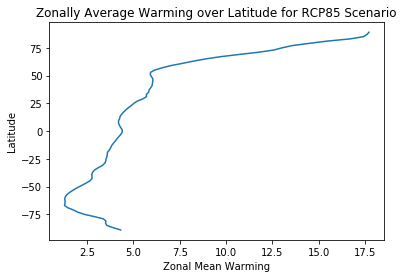

In [7]:
# calcuate zonal mean warming:
zonal_mean_warming=np.mean(warming_sat_map_data, axis = 1) #use np.mean to calculate it, averaging over longitude

# a plot:
plt.plot(zonal_mean_warming,latitude)
plt.xlabel('Zonal Mean Warming')
plt.ylabel('Latitude')
plt.title('Zonally Average Warming over Latitude for RCP85 Scenario')
# show the plot
plt.show()

## 2) Hiatus

note that the array obs contains both the time axis as obs[0,:] 
and the data as obs[1,:]. its shape is: (2, 139)


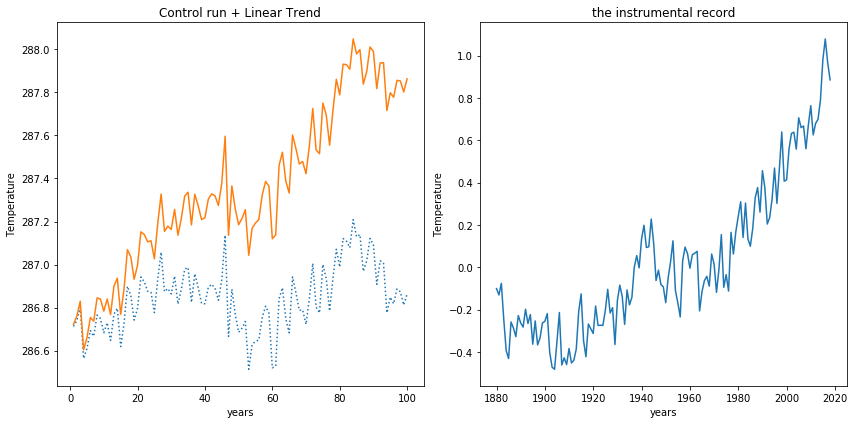

In [8]:
# --------------------------------------------------------------
# plot a monthly time series of global mean SATs from the control
# dataset of the GFDL model with and without added linear trend, 
# to demonstrate how "hiatuses" arise from variability plus a 
# warming trend.  
# Yonathan Vardi 2019-07-12
# --------------------------------------------------------------

fig = plt.figure(figsize=(12,6))

sat_control_series = sat_control_series_GFDL
control_years = np.arange(1, 1+len(sat_control_series))
# generate a linear temperature trend of 0.01 degree per year
control_linear_trend = 0.01*control_years
# combine the trend and the series
series_with_trend = control_linear_trend + sat_control_series

#plot!
plt.subplot(1, 2, 1)
plt.plot(control_years, sat_control_series, ":")
plt.plot(control_years, series_with_trend)

plt.ylabel("Temperature")
plt.xlabel("years")
plt.title("Control run + Linear Trend")

# plot for comparison the global temperature record from the last 100 years:
# --------------------------------------------------------------------------
plt.subplot(1, 2, 2)
obs=sat_obs_GISS_annual_anomaly_timeseries
print("note that the array obs contains both the time axis as obs[0,:] \nand the data as obs[1,:]. its shape is:",obs.shape)
plt.plot(obs[0,:], obs[1,:])
plt.ylabel("Temperature")
plt.xlabel("years")
plt.title("the instrumental record")

#show the plot
plt.tight_layout()
plt.show()


## 3) Equilibrium climate sensitivity.

In [9]:
Delta_F=2.3
Delta_Q=0.5*Delta_F
Delta_F2x=4
Delta_T=1
Delta_T2x=(Delta_F2x * Delta_T)/(Delta_F-Delta_Q)
print("The expected equilibrium (steady-state) warming is ",Delta_T2x)

The expected equilibrium (steady-state) warming is  3.4782608695652177


## 4) Transient Climate sensitivity and the role of the ocean

Solve two coupled differential equations from Held et al 2010 for the
temperatures of the atmosphere and ocean as a function of time given
different ocean depths and radiative forcing values, and plots the
result.

  \begin{align*}
    C_{atm} \frac{d T_{atm}}{d t}&=\Delta F_{2\times}-\lambda_{LW} T_{atm}-\gamma\left(T_{atm}-T_{ocn}\right) \\
    C_{ocn} \frac{d T_{ocn}}{d t}&=\gamma\left(T_{atm}-T_{ocn}\right).\\
  \end{align*}
where the heat capacities of (i) the upper 50 m of the ocean and of the atmosphere, and (ii) of the deep ocean are:
  \begin{align*}
    C_{atm}&=c_p\rho_w 50\\
    C_{ocn}&=c_p\rho_w H
  \end{align*}


Yonathan Vardi 2019-07-17


The temperatures of the atmosphere/ ocean for the case of a shallow ocean are:
Steady state: year= 4999.916666666667 ,T_ocn= 3.7003642180931595 ,T_atm= 3.6995471319101707
10 years: year= 10.0 ,T_ocn= 1.4935175433565488 ,T_atm= 2.2626445680893137
The temperatures of the atmosphere/ ocean for the case of a deep ocean are:
Steady state: year= 4999.916666666667 ,T_ocn= 3.669239409480257 ,T_atm= 3.6836553063198862
10 years: year= 10.0 ,T_ocn= 1.4935175433565488 ,T_atm= 1.7724369577561223


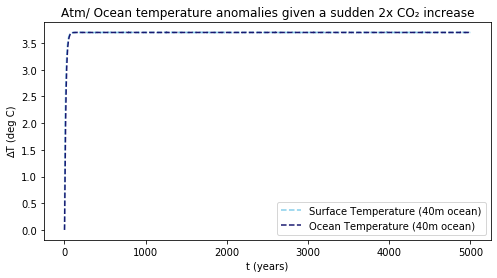

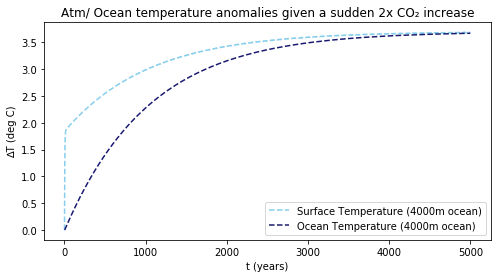

Clearly, the surface and ocean temperature has a more delayed response to deep ocean (4000m) change in temperature from the doubling of CO2 than the shallow ocean (40m).
This is because the ocean has a much higher heat capacity and it will take a much longer time for the energy to fully penetrate the deep ocean.
Further, the steady-state solutions are consistent with numerical results because temperatures are expected to increase about 3.7 degrees Celsius overall, falling in line with the steady-state outputs. The results show just how long it will take to fully achieve this steady-state.


In [10]:
# solve the above two ordinary differential equations and plot, for a deep and a shallow ocean.
import numpy as np
from numpy import linalg
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib
from math import pi
from scipy.integrate import ode


########################################################################
# functions
########################################################################
# Right hand side to be integrated:
def right_hand_side(t, T, depth):
    T_atm=T[0]
    T_ocn=T[1]
    lambda_LW = 1.0      #longwave radiative cooling coefficient
    c_atm = c_p * rho_w * 50 #specific heat of upper ocean and atmosphere
    dF = 3.7  #radiative forcing 
    c_ocn = c_p * rho_w * depth  #the specific heat of the ocean
    gamma = 1   #strength of coupling between surface and deep
    dT_atm_dt = ((dF - lambda_LW*T_atm) - gamma*(T_atm-T_ocn))/c_atm
    dT_ocn_dt = gamma*(T_atm-T_ocn)/c_ocn
    return [dT_atm_dt, dT_ocn_dt]

def solve_ODE(depth):
    """
    Solve the ODE for a given ocean depth
    Input: Depth of the ocean.
    Output: ocean temperature time series, atmospheric temerature time series, and the time axis.
    """
    y0=T0
    tspan=(times_save[0],times_save[-1])
    sol = solve_ivp(fun=lambda t,T: right_hand_side(t,T,depth) \
                ,vectorized=False,y0=T0,t_span=tspan,t_eval=times_save)
    time_array=sol.t
    T_atm_array=sol.y[0,:]
    T_ocn_array=sol.y[1,:]
    
    return T_ocn_array,T_atm_array, time_array/YEAR


########################################################################
# Main program
########################################################################

# set parameters:
# ---------------
YEAR = 31536000 # A year in seconds
YEARS_TO_RUN = 5000
T0, time_start = (0.0,0.0), 0.0 # initial values for (T_ocn, T_atm) and time:
time_end = YEAR * YEARS_TO_RUN #the maximum value of time
times_save = np.arange(time_start,time_end,YEAR/12) # times for saving ODE solution 
N=len(times_save) #the number of points calculated
c_p = 4005 # J/kg, specific heat of seawater
rho_w = 1023.6 # kg/m^3, density of seawater 


# solve for temperature in both cases:
# ------------------------------------
T_ocn_array_deep,   T_atm_array_deep,   time_array_deep    = solve_ODE(depth=4000)
T_ocn_array_shallow,T_atm_array_shallow,time_array_shallow = solve_ODE(depth=40)

# print final results at 10 years and at steady state:
# ----------------------------------------------------
print("The temperatures of the atmosphere/ ocean for the case of a shallow ocean are:")
print("Steady state: year=",time_array_shallow[-1],",T_ocn=",T_ocn_array_shallow[-1],",T_atm=",T_atm_array_shallow[-1])
# print the same at 10 years:
print("10 years: year=",time_array_shallow[120],",T_ocn=",T_ocn_array_shallow[120],",T_atm=",T_atm_array_shallow[120])

print("The temperatures of the atmosphere/ ocean for the case of a deep ocean are:")
# Deep same as above, for 10 years and at steady state
print("Steady state: year=",time_array_deep[-1],",T_ocn=",T_ocn_array_deep[-1],",T_atm=",T_atm_array_deep[-1])
# print the same at 10 years:
print("10 years: year=",time_array_deep[120],",T_ocn=",T_ocn_array_shallow[120],",T_atm=",T_atm_array_deep[120])

# plot solution time series for a shallow ocean:
# ----------------------------------------------
plt.figure(figsize=(8,4));
plt.plot(time_array_shallow, T_atm_array_shallow, "--", color='SkyBlue', 
         label="Surface Temperature (40m ocean)")
plt.plot(time_array_shallow, T_ocn_array_shallow, "--", color='MidnightBlue',
         label="Ocean Temperature (40m ocean)")
plt.ylabel('∆T (deg C)')
plt.xlabel('t (years)')
plt.title('Atm/ Ocean temperature anomalies given a sudden 2x CO₂ increase')
plt.legend(loc='lower right')
plt.show()

# plot solution time series for a deep ocean:
# -------------------------------------------
plt.figure(figsize=(8,4));
plt.plot(time_array_deep, T_atm_array_deep, "--", color='SkyBlue', 
         label="Surface Temperature (4000m ocean)")
plt.plot(time_array_deep, T_ocn_array_deep, "--", color='MidnightBlue',
         label="Ocean Temperature (4000m ocean)")
plt.ylabel('∆T (deg C)')
plt.xlabel('t (years)')
plt.title('Atm/ Ocean temperature anomalies given a sudden 2x CO₂ increase')
plt.legend(loc='lower right')
plt.show()

print("Clearly, the surface and ocean temperature has a more delayed response to deep ocean (4000m) change in temperature from the doubling of CO2 than the shallow ocean (40m).")
print("This is because the ocean has a much higher heat capacity and it will take a much longer time for the energy to fully penetrate the deep ocean.")
print("Further, the steady-state solutions are consistent with numerical results because temperatures are expected to increase about 3.7 degrees Celsius overall, falling in line with the steady-state outputs. The results show just how long it will take to fully achieve this steady-state.")

## 5) Climate feedbacks leading to polar amplification

### a) Estimate the Planck Feedback for two temperatures. 

Using $\Delta F=RHS=\epsilon\sigma ((T+\Delta T)^4-T^4)$

In [11]:
# calculate the following for both T=-10C and T=10C
# In Kelvin, these are 263 and 283

T=263
DeltaT=1.61
epsilon=0.6
sigma=5.67e-8
print("DeltaF=4, T=",T,", DeltaT=",DeltaT,",RHS=",epsilon*sigma*((T + DeltaT)**4 - T**4))
# In order to find the derivative, we can approximate it by dividing DeltaT by DeltaF
dt1dF = DeltaT / (epsilon*sigma*((T + DeltaT)**4 - T**4))
print("dtdF for -10C is: ", dt1dF)

T=283
DeltaT=1.29
epsilon=0.6
sigma=5.67e-8
print("DeltaF=4, T=",T,", DeltaT=",DeltaT,",RHS=",epsilon*sigma*((T + DeltaT)**4 - T**4))
# In order to find the derivative, we can approximate it by dividing DeltaT by DeltaF
dt2dF = DeltaT / (epsilon*sigma*((T + DeltaT)**4 - T**4))
print("dtdF for 10C is: ", dt2dF)

# discuss your findings
print("\nIt seems that dtdF is higher for lower temperatures, and lower for higher temperatures. Further, there seems to be a higher DeltaT for lower temperatures than higher temperatures. Therefore, this is consistent with the theoretical calculations, because the Arctic has lower starting temperatures, meaning there is a higher increase in temperature.")


DeltaF=4, T= 263 , DeltaT= 1.61 ,RHS= 4.022289159789454
dtdF for -10C is:  0.40026958183291705
DeltaF=4, T= 283 , DeltaT= 1.29 ,RHS= 4.006006537687089
dtdF for 10C is:  0.3220164490157811

It seems that dtdF is higher for lower temperatures, and lower for higher temperatures. Further, there seems to be a higher DeltaT for lower temperatures than higher temperatures. Therefore, this is consistent with the theoretical calculations, because the Arctic has lower starting temperatures, meaning there is a higher increase in temperature.


### b) Estimate the topical lapse rate feedback

As altitude increases, it seems that the difference between the initial start temperatures increases. The hotter air parcel stays at a hotter temperature than the 25 degree air parcel.
Further, this is because the parcel is being raised in a tropical atmosphere, meaning that warming is increased for warmer air parcels.


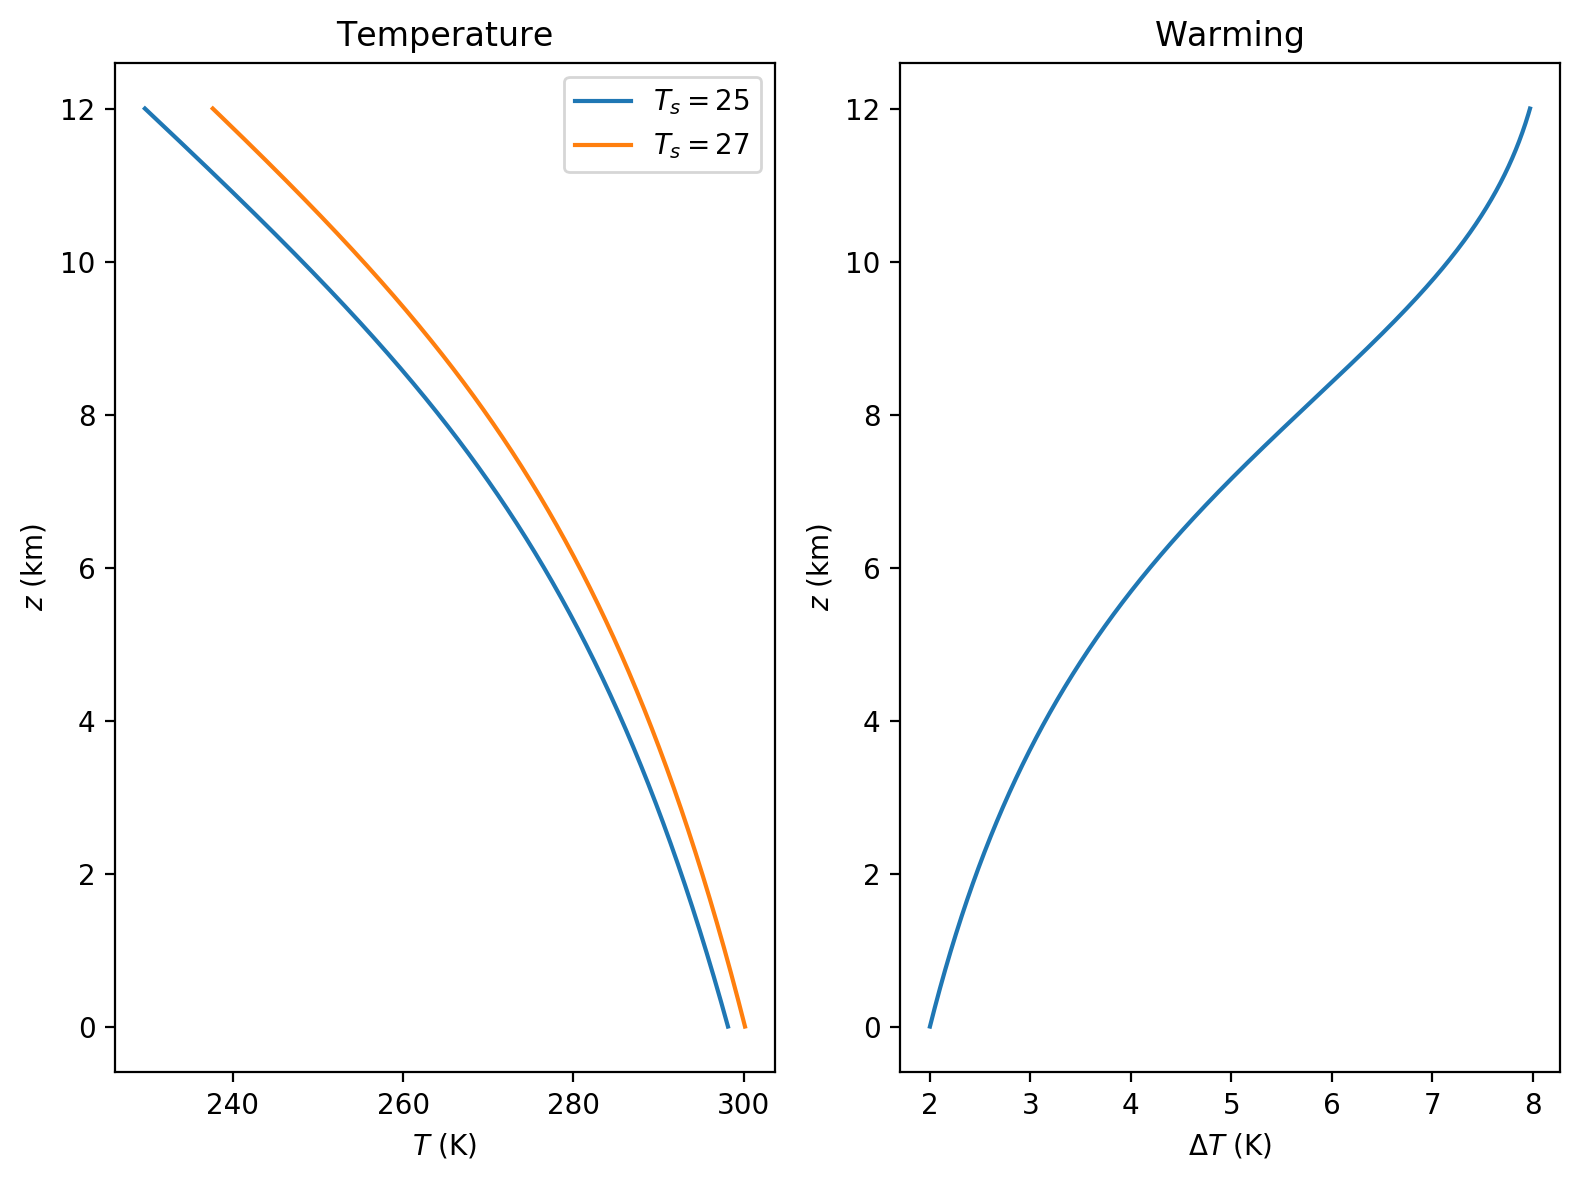

In [17]:
# PHYSICAL CONSTANTS
PZERO   = 101325.0 # sea-level pressure, N/sq.m
g       = 9.81     # gravity
R_water = 461.52   # gas constant J/kg/K
R_dry   = 287      # gas constant J/kg/K
cp_dry  = 1005     # J/kg/K
L       = 24.93e5  # latent heat J/kg (vaporization at t.p.)


def q_sat(T,P):
    """
    Calculate saturation specific humidity (gr water vapor per gram moist air).
    inputs:
    T: temperature, in Kelvin
    P: pressure, in mb
    """
    R_v = 461 # Gas constant for moist air = 461 J/(kg*K)
    R_d = 287 # Gas constant 287 J K^-1 kg^-1
    TT = T-273.15 # Kelvin to Celsius
    # Saturation water vapor pressure (mb) from Emanuel 4.4.14 p 116-117: 
    ew = 6.112*np.exp((17.67 * TT) / (TT + 243.5))
    # saturation mixing ratio (gr water vapor per gram dry air):
    rw = (R_d / R_v) * ew / (P - ew)
    # saturation specific humidity (gr water vapor per gram moist air):
    qw = rw / (1 + rw)
    return qw

## Calculate moist adiabatic temperature profiles for two surface temperatures

# Define the height coordinates, calculate background pressure and temperature profiles. 
z = np.linspace(0,12,1001) # z in km
p = np.zeros(np.shape(z))  # initialize P array
#T_env = np.zeros(np.shape(z))  # initialize T array

# Assume isothermal atmosphere to calculate the atmospheric pressure at z:
T_const = 273.15
p = PZERO*np.exp(-g*z/R_dry/T_const)/100 # convert pressure to mb for q_sat

def MSE_conservation(T,P,z,MSE_s,q_s):
    """ This function is called by a root finder to calculate 
    the temperature of a rising parcel. it is equal to zero when 
    MSE conservation is satisfied.
    """
    qsat=q_sat(T,P)
    # the root finder is looking for the value of T for which the following is zero:
    ans = cp_dry*T+L*min(q_s,qsat)+g*z-MSE_s  
    return(ans)


def calc_moist_adiabatic_T_profile(p_s,T_s,z_s,RH_s):
    """ Use conservation of MSE to calculate the temperature of a 
        adiabatically lifted moist parcel.
    """

    q_s=RH_s*q_sat(T_s,p_s)
    # initial MSE at surface, to be conserved by rising air parcel:
    MSE_s = cp_dry*T_s+g*z_s+L*q_s
    T_parcel = np.zeros(np.shape(z))
    
    T_parcel[0] = T_s
    for i in range(1,len(z)):
        sol = optimize.root(MSE_conservation, T_parcel[i-1], args=(p[i],z[i]*1000,MSE_s,q_s))
        T_parcel[i] = sol.x
            
    return T_parcel


# initiaize figure and two subplots for temperature and relative humidity:
plt.figure(figsize=(8,6),dpi=200)

plt.subplot(1,2,1)
# calculate and plot first convcection profile:
p0 = p[0]
t0 = 273.15 + 25 #t[0]
z0 = z[0]
RH = 1.0
T_profile1 = calc_moist_adiabatic_T_profile(p0,t0,z0,RH)
plt.plot(T_profile1,z,label="$T_s=25$")

# calculate and plot second convcection profile starting with Ts=27C:
p0 = p[0]
t0 = 273.15 + 27 #t[0]
z0 = z[0]
RH = 1.0
T_profile2 = calc_moist_adiabatic_T_profile(p0,t0,z0,RH)
plt.plot(T_profile2,z,label="$T_s=27$")


# labels and title for first subplot:
plt.legend()
plt.xlabel('$T$ (K)')
plt.ylabel('$z$ (km)')
plt.title('Temperature');

# plot temperature difference as function of height:
plt.subplot(1,2,2)
plt.plot(abs(T_profile2 - T_profile1),z)
plt.xlabel('$\Delta T$ (K)')
plt.ylabel('$z$ (km)')
plt.title('Warming');

plt.tight_layout()

print("As altitude increases, it seems that the difference between the initial start temperatures increases. The hotter air parcel stays at a hotter temperature than the 25 degree air parcel.")
print("Further, this is because the parcel is being raised in a tropical atmosphere, meaning that warming is increased for warmer air parcels.")